<a href="https://colab.research.google.com/github/saritmaitra/Forex_VAR-VECM/blob/main/correlation_23Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyforest
from pyforest import *
import datetime, pickle, copy, warnings
from pandas import DataFrame, merge, concat
import glob
plt.style.use('dark_background')
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving AL_23_series.csv to AL_23_series.csv


In [ ]:
print('view data...')
df = pd.read_csv("AL_23_series.csv")
print('dropping unnecessary column...')
df.drop(columns = ['Unnamed: 0'], axis=1, inplace=True)
print('setting datetime index....')
df = df.set_index('timestamp')
df.index = pd.to_datetime(df.index)
print('dropping duplicates (if any)...')
df.drop_duplicates(keep=False)
df.sample(5) # random samples

view data...


<IPython.core.display.Javascript object>

dropping unnecessary column...
setting datetime index....


<IPython.core.display.Javascript object>

dropping duplicates (if any)...


,6e,6j,es,eurusd,gbpusd,gc,nq,usdjpy,audjpy,audnzd,audusd,euraud,eurchf,si,nzdusd,tnm0,ub,usdcad,ymm0,zbm0,zfm0,znm0,ztm0
timestamp,,,,,,,,,,,,,,,,,,,,,,,
2020-04-07 11:16:00,1.089875,0.009185,2732.875,1087405.0,1229420.0,1707.40,8276.750,109102500.0,67436500.0,1032975.0,618120.0,1759100.0,1058240.0,15.6675,598365.0,155.265625,222.718750,1402020.0,23314.0,178.859375,124.761719,137.820312,110.064453
2020-04-08 17:01:00,1.088325,0.009225,2712.625,1086200.0,1240880.0,1687.60,8169.250,108637000.0,67653000.0,1034750.0,622735.0,1744050.0,1055215.0,15.2850,601815.0,155.335938,223.015625,1402870.0,23098.5,178.828125,124.988281,138.023438,110.126953
2020-04-01 20:30:00,1.098650,0.009355,2452.125,1095890.0,1238700.0,1600.25,7452.375,107190000.0,65046000.0,1024650.0,606765.0,1807280.0,1058455.0,13.9825,591640.0,157.273438,226.796875,1416950.0,20768.5,181.984375,125.355469,139.085938,110.162109
2020-04-28 02:07:00,1.083825,0.009330,2856.375,1082695.0,1241560.0,1715.10,8787.750,107264500.0,69081000.0,1073150.0,643945.0,1681260.0,1056345.0,15.1850,600065.0,156.523438,224.593750,1406145.0,24113.0,180.515625,125.222656,138.679688,110.158203
2020-04-07 03:56:00,1.083975,0.009210,2629.125,1081600.0,1226635.0,1710.85,7963.250,108788500.0,66523500.0,1026875.0,611555.0,1768550.0,1056310.0,15.6675,595555.0,156.164062,224.687500,1410475.0,22316.5,180.234375,124.980469,138.382812,110.099609


In [ ]:
# sorting rows in ascending order
df = df.sort_values(by='timestamp', ascending=True)

## 1 Visualization:

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

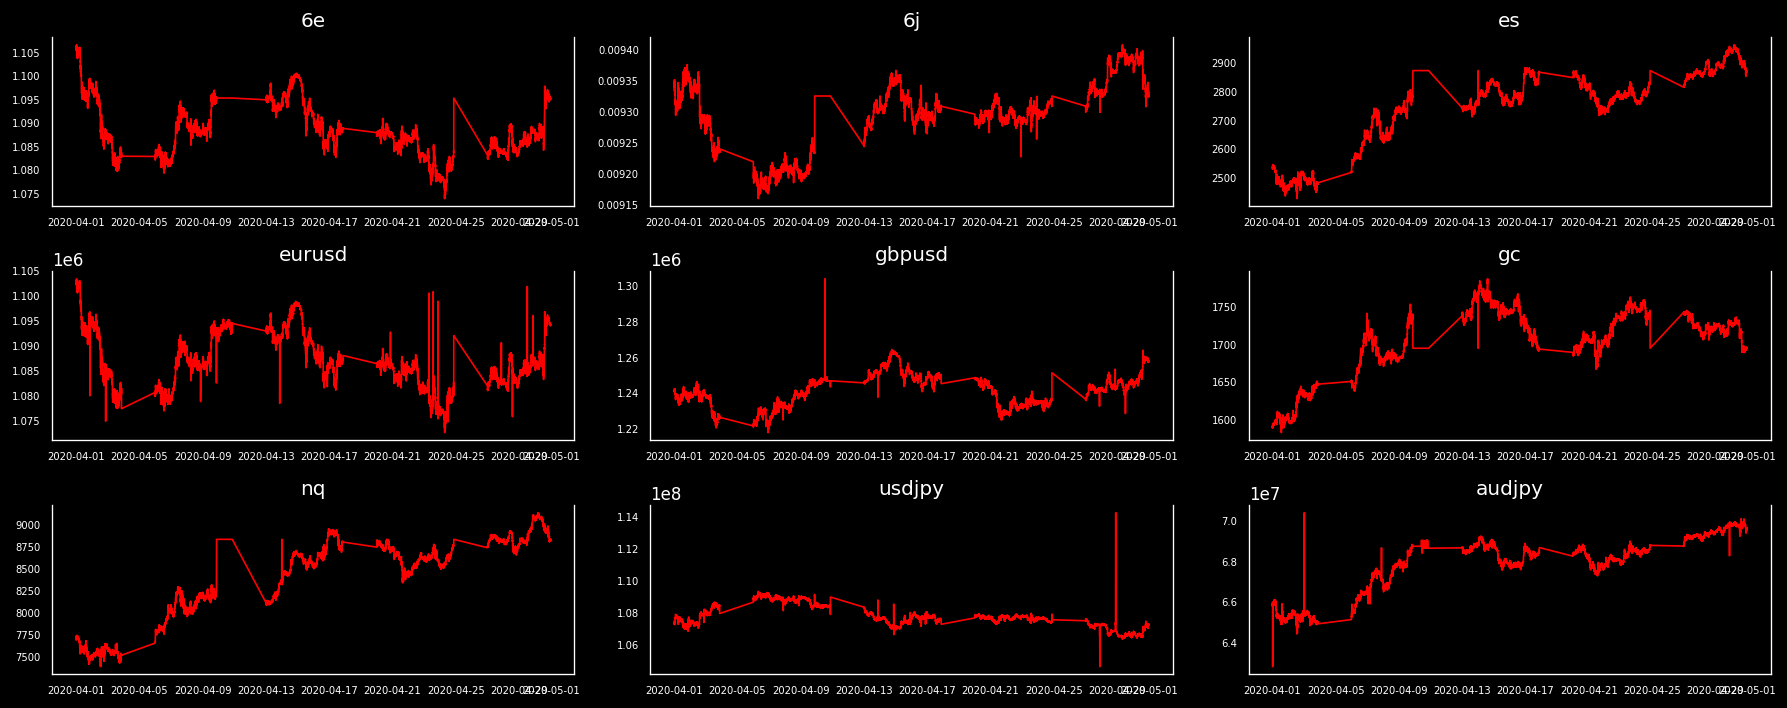

In [ ]:
# visualizing 10 series
x = df[['6e','6j','es','eurusd','gbpusd','gc','nq','usdjpy','audjpy']]

# Plot
plt.style.use('dark_background')
fig, axes = plt.subplots(nrows=3, ncols=3, dpi=120, figsize=(15,6))

for i, ax in enumerate(axes.flatten()):
    dataset = x[x.columns[i]]
    ax.plot(dataset, color='red', linewidth=1)
    # Decorations
    ax.set_title(x.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines['top'].set_alpha(0)
    ax.tick_params(labelsize=6)
    plt.tight_layout();

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

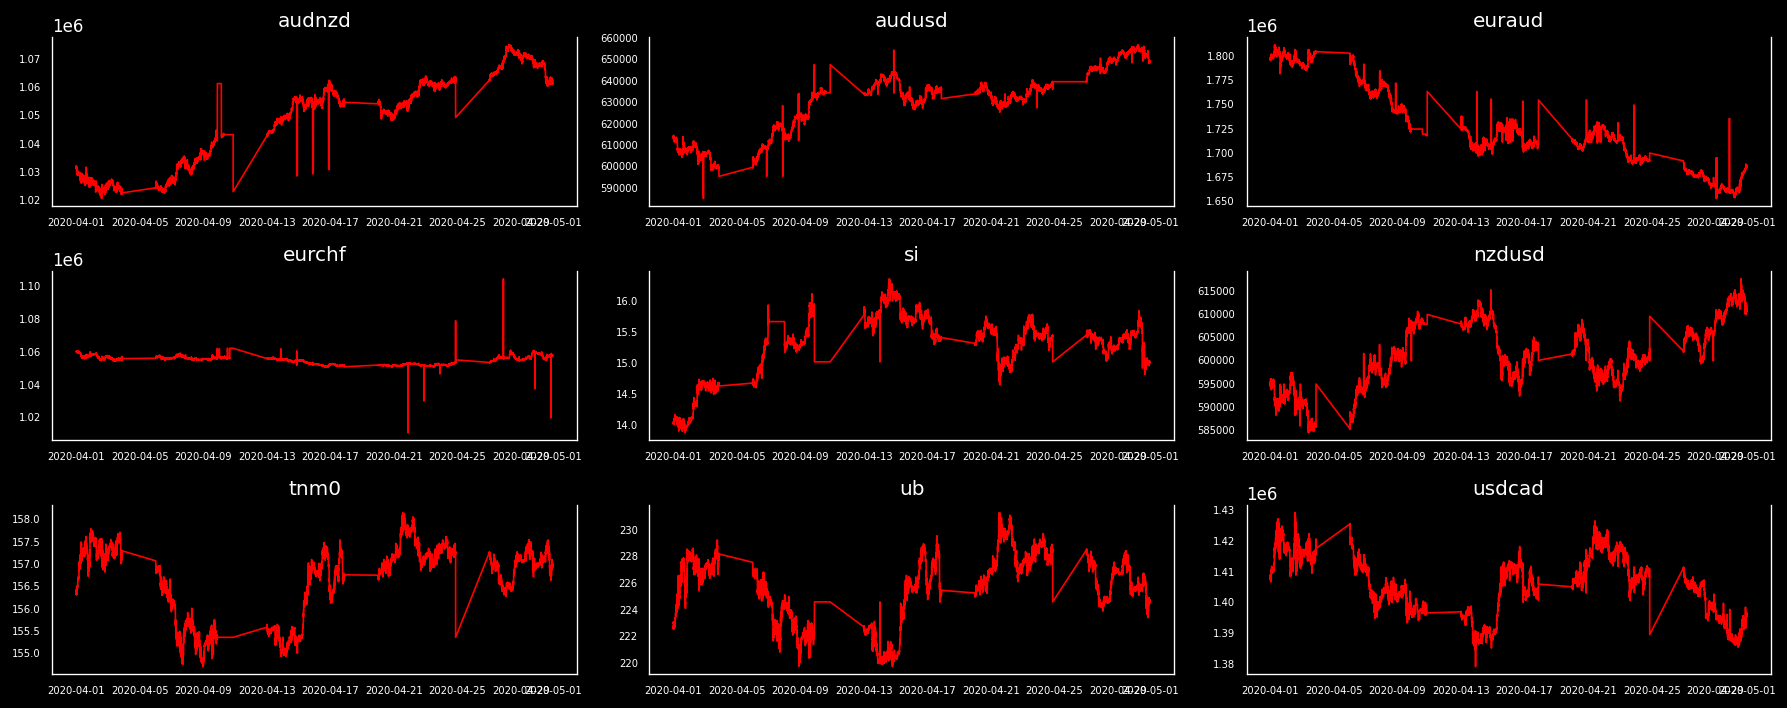

In [ ]:
# visualizing 10 series
x = df[['audnzd','audusd','euraud','eurchf','si','nzdusd','tnm0','ub','usdcad']]

# Plot
plt.style.use('dark_background')
fig, axes = plt.subplots(nrows=3, ncols=3, dpi=120, figsize=(15,6))

for i, ax in enumerate(axes.flatten()):
    dataset = x[x.columns[i]]
    ax.plot(dataset, color='red', linewidth=1)
    # Decorations
    ax.set_title(x.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines['top'].set_alpha(0)
    ax.tick_params(labelsize=6)
    plt.tight_layout();

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

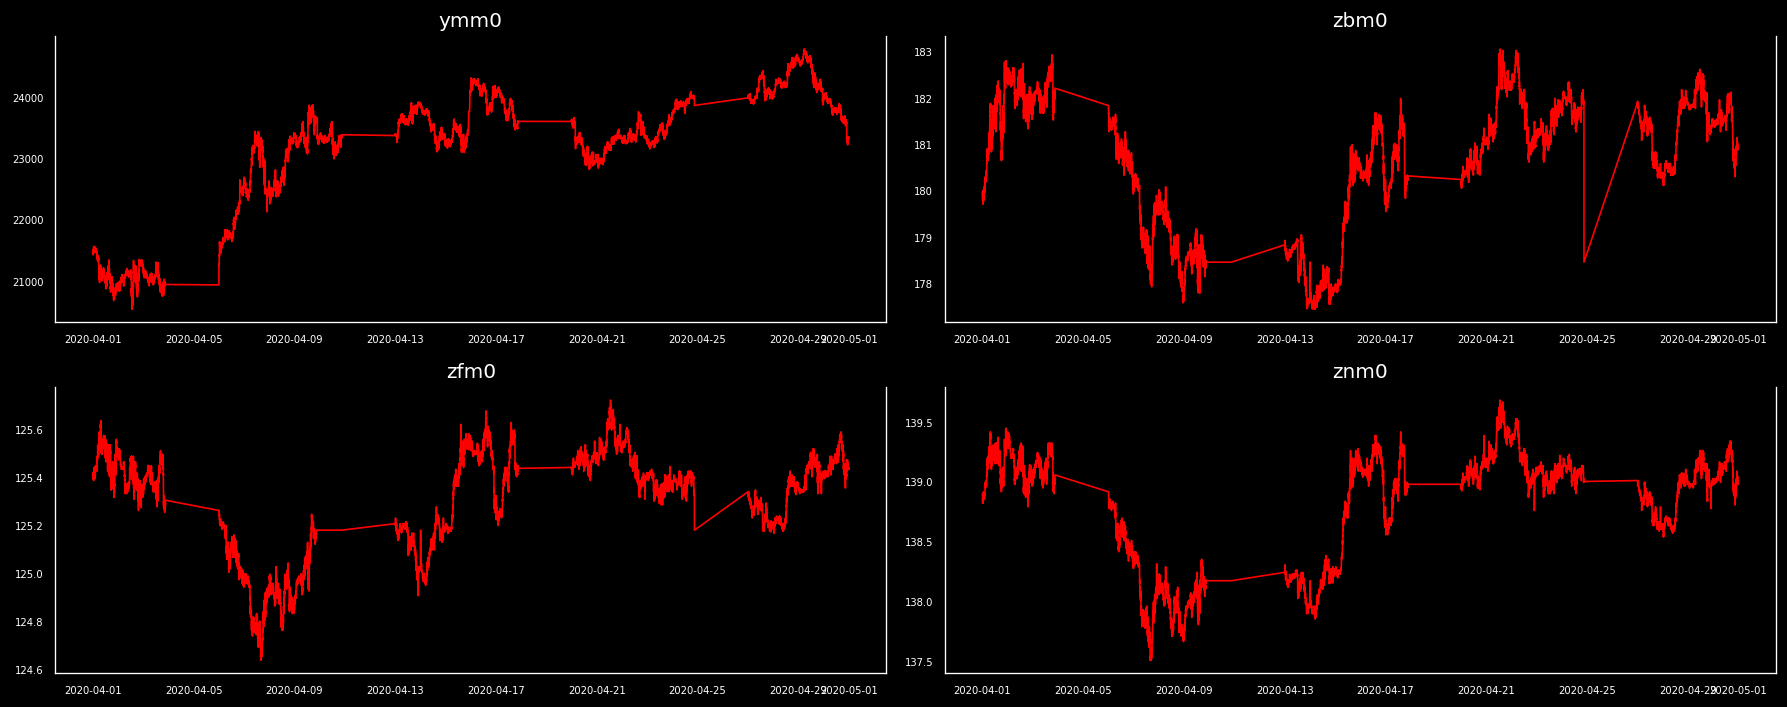

In [ ]:
# visualizing 10 series
x = df[['ymm0','zbm0','zfm0','znm0']]

# Plot
plt.style.use('dark_background')
fig, axes = plt.subplots(nrows=2, ncols=2, dpi=120, figsize=(15,6))

for i, ax in enumerate(axes.flatten()):
    dataset = x[x.columns[i]]
    ax.plot(dataset, color='red', linewidth=1)
    # Decorations
    ax.set_title(x.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines['top'].set_alpha(0)
    ax.tick_params(labelsize=6)
    plt.tight_layout();

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

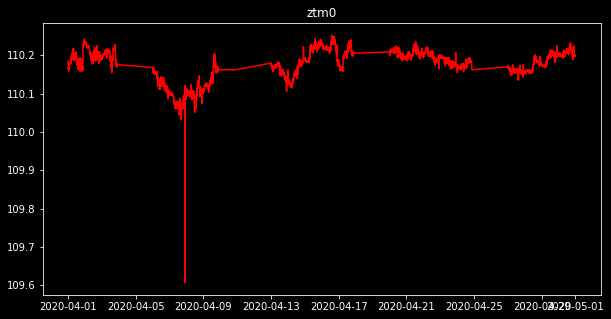

In [ ]:
# visualizing 10 series
plt.figure(figsize= (10,5))
plt.plot(df['ztm0'], color ='r')
plt.title('ztm0'); plt.show()

In [ ]:
df.aggregate([min, np.mean,np.std,np.median,max]).round(2).transpose()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,min,mean,std,median,max
6e,1.070000e+00,1.090000e+00,0.01,1.090000e+00,1.110000e+00
6j,1.000000e-02,1.000000e-02,0.00,1.000000e-02,1.000000e-02
es,2.427880e+03,2.753560e+03,130.90,2.784120e+03,2.964620e+03
eurusd,1.072760e+06,1.087090e+06,5511.17,1.086390e+06,1.103550e+06
gbpusd,1.218130e+06,1.241616e+06,8899.02,1.242115e+06,1.304000e+06
gc,1.583500e+03,1.706190e+03,43.62,1.714400e+03,1.787600e+03
nq,7.386120e+03,8.427890e+03,454.74,8.593620e+03,9.144000e+03
usdjpy,1.046340e+08,1.077756e+08,716554.43,1.076830e+08,1.142800e+08
audjpy,6.282500e+07,6.793452e+07,1335020.35,6.830400e+07,7.040900e+07
audnzd,1.020450e+06,1.048935e+06,15469.61,1.053225e+06,1.075125e+06


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression

## 2 Unit Root:
Agumented Dickey-Fuller test for stationarity to look for unit roots by attempting to fit an autoregressive model to the data.




### 2.1 Augmented Dickey-Fuller
- H0 this test is that there is a unit root. 
- H1 is that the time series is stationary, or trend stationary. 

If the test statistic < critical Value, we can reject the null hypothesis and say that the series is stationary; if the p-value is less than alpha we can reject the null hypothesis.

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")
        
# ADF Test on each column
for name, column in df.iteritems():
    adfuller_test(column, name=column.name)
    print()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


    Augmented Dickey-Fuller Test on "6e" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.2453
 No. Lags Chosen       = 6
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0175. Rejecting Null Hypothesis.
 => Series is Stationary.

    Augmented Dickey-Fuller Test on "6j" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.1885
 No. Lags Chosen       = 12
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.2104. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.

    Augmented Dickey-Fuller Test on "es" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Signific

### 2.2 KPSS:

Reject the null hypothesis of stationarity if the value of the test statistic > 10%, 5% and 1% critical values. 
- The null hypothesis is that the data is stationary, 
- the alternate hypothesis for the test is that the data is not stationary.

If we fail to reject the null hypothesis it means our time series is stationary or trend stationary, because KPSS classifies a series as stationary on the absence of a unit root.

In [ ]:
from statsmodels.tsa.stattools import kpss
import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.stattools import kpss
def kpss_test(timeseries, signif=0.05, name='', verbose=False):
    print ('Results of KPSS Test:')
    r = kpss(timeseries, regression='c', lags="auto")
    output = {'test_statistic':round(r[0], 3), 'pvalue':round(r[1], 3), 'n_lags':round(r[2], 3), 'n_obs':r[3]}
    p_value = output['pvalue']
    def adjust(val, length= 6): return str(val).ljust(length)

  
# Print Summary
    print(f'    KPSS Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[3].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is: Non-Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Stationary.")

# KPSS Test on each column
for name, column in df.iteritems():
    kpss_test(column, name = column.name)
    print()

"""
test statistics with non-standard distributions is that the available p-values are available only for a restricted range. 
If the value is outside this range, then only the boundary value is reported and the actual p-value is somewhere above the
upper limit or somewhere below the lower limit.
If reported p-value is at the upper bound 0.1, the actual p-value will be larger than 0.1, 
so we cannot reject the Null hypothesis of stationarity. 
If the reported p-value is the lower bound of the range 0.01, and the actual p-value will be smaller than 0.01. 
So we can reject the Null hypothesis of stationarity with alpha 0.01.
"""

Results of KPSS Test:
    KPSS Test on "6e" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 6.725
 No. Lags Chosen       = 101
 Critical value 10%    = 0.347
 Critical value 5%     = 0.463
 Critical value 2.5%   = 0.574
 Critical value 1%     = 0.739
 => P-Value = 0.01. Rejecting Null Hypothesis.
 => Series is: Non-Stationary.

Results of KPSS Test:
    KPSS Test on "6j" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 11.305
 No. Lags Chosen       = 101
 Critical value 10%    = 0.347
 Critical value 5%     = 0.463
 Critical value 2.5%   = 0.574
 Critical value 1%     = 0.739
 => P-Value = 0.01. Rejecting Null Hypothesis.
 => Series is: Non-Stationary.

Results of KPSS Test:
    KPSS Test on "es" 
    -----------------------------------------------
 Null Hypothes

'\ntest statistics with non-standard distributions is that the available p-values are available only for a restricted range. \nIf the value is outside this range, then only the boundary value is reported and the actual p-value is somewhere above the\nupper limit or somewhere below the lower limit.\nIf reported p-value is at the upper bound 0.1, the actual p-value will be larger than 0.1, \nso we cannot reject the Null hypothesis of stationarity. \nIf the reported p-value is the lower bound of the range 0.01, and the actual p-value will be smaller than 0.01. \nSo we can reject the Null hypothesis of stationarity with alpha 0.01.\n'

# 3 Changes over time

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# spliting train/test
nobs = 10 # keeping 10 mins observations aside for validation
train, test = df[0:- nobs], df[- nobs:]

# Check size
print(train.shape, test.shape); print()

"""
stationary time series means a constant mean and variance over time, which makes it easy for predicting values.
From a statistics point of view, absolute changes are not optimal because they
are dependent on the scale of the time series data itself. Therefore, % changes are usually preferred.
However, I have used logdiff whic is an alternative to percentage changewhic are easier to handle.
"""

# log transfoming training data set
train_log = np.log(train) # log transformation
train_trans = train_log.diff().dropna() # 1st order differencing
# differenced data will contain one less point than the original data.
print('Description of diff data:'); print(train_trans.describe().transpose());

(30957, 23) (10, 23)



<IPython.core.display.Javascript object>

Description of diff data:
          count          mean       std  ...  50%       75%       max
6e      30956.0 -3.155349e-07  0.000174  ...  0.0  0.000069  0.010646
6j      30956.0 -2.336818e-08  0.000172  ...  0.0  0.000054  0.009779
es      30956.0  3.959373e-06  0.000769  ...  0.0  0.000270  0.038026
eurusd  30956.0 -2.493683e-07  0.000423  ...  0.0  0.000069  0.020199
gbpusd  30956.0  4.323059e-07  0.000470  ...  0.0  0.000082  0.043818
gc      30956.0  2.031027e-06  0.000633  ...  0.0  0.000199  0.043964
nq      30956.0  4.348223e-06  0.000987  ...  0.0  0.000277  0.070091
usdjpy  30956.0 -6.062877e-08  0.000611  ...  0.0  0.000060  0.062725
audjpy  30956.0  1.749417e-06  0.000877  ...  0.0  0.000138  0.073692
audnzd  30956.0  9.213780e-07  0.000497  ...  0.0  0.000071  0.028924
audusd  30956.0  1.811010e-06  0.000831  ...  0.0  0.000154  0.038440
euraud  30956.0 -2.049175e-06  0.000999  ...  0.0  0.000117  0.044642
eurchf  30956.0 -8.129078e-08  0.000675  ...  0.0  0.000024  0.0

LogDiff normalizing the data as well; by using normalization methods it is possible to significantly reduce correlation. Normalization procedures affect both the true correlation, stemming from features interactions, and the spurious correlation induced by random noise.

<IPython.core.display.Javascript object>

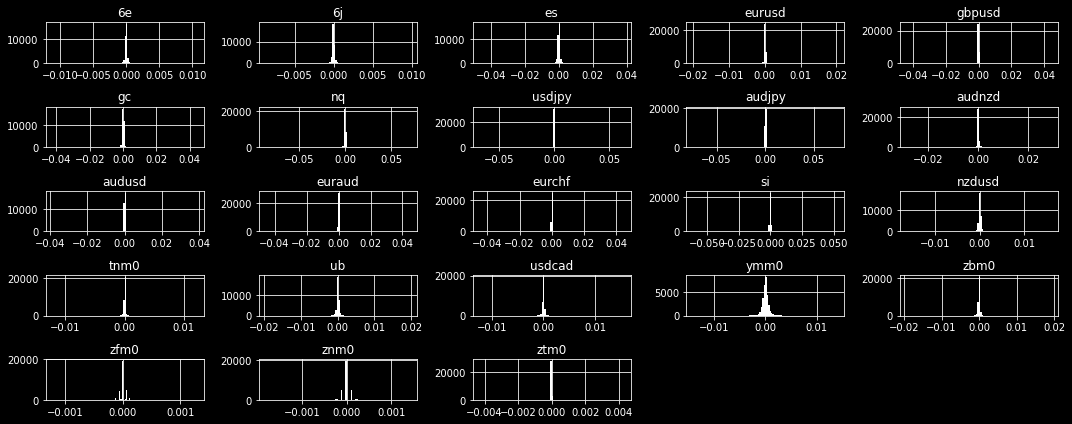

In [ ]:
train_trans.hist(figsize=(15, 6),color='w',bins=100)
plt.tight_layout()

## 3.1 Unit root test (transformed data):

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")
        
# ADF Test on each column
for name, column in train_trans.iteritems():
    adfuller_test(column, name=column.name)
    print()

    Augmented Dickey-Fuller Test on "6e" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -78.7753
 No. Lags Chosen       = 5
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.

    Augmented Dickey-Fuller Test on "6j" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -54.3021
 No. Lags Chosen       = 11
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.

    Augmented Dickey-Fuller Test on "es" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test

In [ ]:
from statsmodels.tsa.stattools import kpss
import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.stattools import kpss
def kpss_test(timeseries, signif=0.05, name='', verbose=False):
    print ('Results of KPSS Test:')
    r = kpss(timeseries, regression='c', lags="auto")
    output = {'test_statistic':round(r[0], 3), 'pvalue':round(r[1], 3), 'n_lags':round(r[2], 3), 'n_obs':r[3]}
    p_value = output['pvalue']
    def adjust(val, length= 6): return str(val).ljust(length)

  
# Print Summary
    print(f'    KPSS Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[3].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is: Non-Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Stationary.")

# KPSS Test on each column
for name, column in train_trans.iteritems():
    kpss_test(column, name = column.name)
    print()

Results of KPSS Test:
    KPSS Test on "6e" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 0.218
 No. Lags Chosen       = 50
 Critical value 10%    = 0.347
 Critical value 5%     = 0.463
 Critical value 2.5%   = 0.574
 Critical value 1%     = 0.739
 => P-Value = 0.1. Weak evidence to reject the Null Hypothesis.
 => Series is Stationary.

Results of KPSS Test:
    KPSS Test on "6j" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 0.077
 No. Lags Chosen       = 43
 Critical value 10%    = 0.347
 Critical value 5%     = 0.463
 Critical value 2.5%   = 0.574
 Critical value 1%     = 0.739
 => P-Value = 0.1. Weak evidence to reject the Null Hypothesis.
 => Series is Stationary.

Results of KPSS Test:
    KPSS Test on "es" 
    -----------------------------------------

In [ ]:
# saving final data set
train_trans.to_csv("AL_23_series_normalized.csv")

In [ ]:
files.download('AL_23_series_normalized.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 4 Multi-colinearity:

## 4.1 Pearson correlation:

correlation matrix (differenced data):
              6e        6j        es    eurusd    gbpusd        gc        nq    usdjpy    audjpy    audnzd    audusd    euraud    eurchf        si  \
6e      1.000000  0.296929  0.237992  0.380402  0.300724 -0.100848  0.160839 -0.074791  0.090333 -0.046681  0.156150  0.035946 -0.027485 -0.025942   
6j      0.296929  1.000000  0.111083  0.149145  0.122631 -0.121750  0.235204 -0.167988 -0.053592 -0.001136  0.042563  0.071023 -0.004735 -0.197612   
es      0.237992  0.111083  1.000000  0.112710  0.104534 -0.340552  0.909160  0.045412  0.103509 -0.036619  0.113781  0.056481 -0.007332 -0.287417   
eurusd  0.380402  0.149145  0.112710  1.000000  0.110599 -0.043828  0.104907 -0.042499  0.022741  0.008252 -0.003804 -0.004886  0.010654 -0.039846   
gbpusd  0.300724  0.122631  0.104534  0.110599  1.000000 -0.026499  0.064356 -0.050407  0.043033 -0.019136  0.098446 -0.011306 -0.052141  0.002677   
gc     -0.100848 -0.121750 -0.340552 -0.043828 -0.026499  1.0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

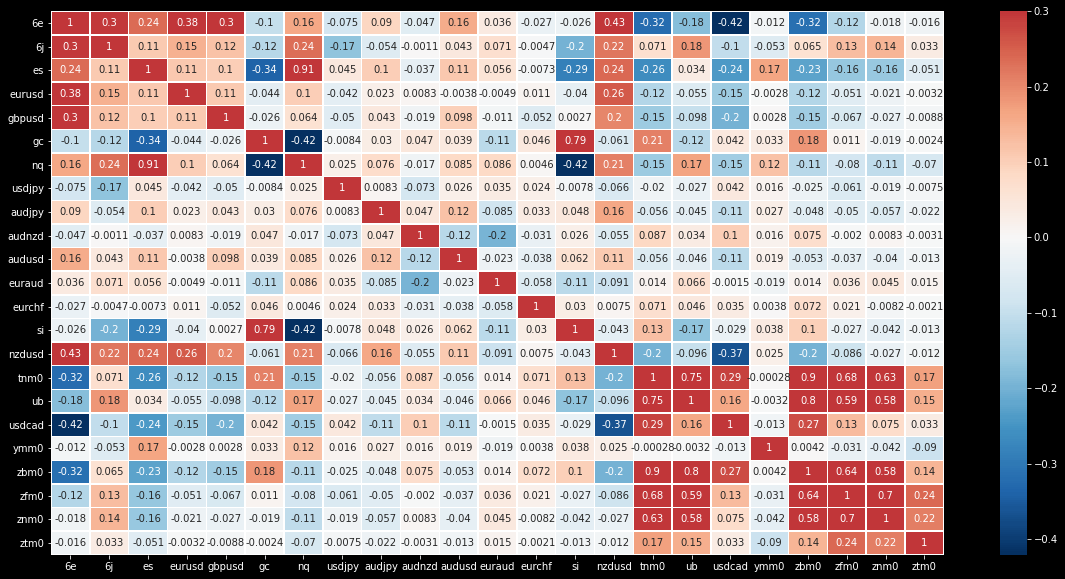

In [ ]:
# rechecking correlation on transformed data
col = train_trans.copy()
print('correlation matrix (differenced data):')
print(col.corr())
pearsoncorr = col.corr(method='pearson')

"""
Pearson correlation matrix and plots show the bivariate relationship between the independent variables.
"""

# Set up the matplotlib figure
plt.figure(figsize=(20,10))
sns.heatmap(pearsoncorr, xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',annot=True,linewidth=0.5,
            vmax=.3, center=0)
plt.show()

1.  nq & es (0,91)
2.  si & gc (0,79)
3.  zbm0 & tnm0 (0,90)
4.  zbm0 & ub (0.80)
5.  zfm0 & tnm0 (0,68)
6.  zfm0 & ub (0.59)
7.  zmno & tnmo (0,63)
8.  znm0 & ub (0.58)


## 4.2 VIF:
R^2 value shows how well an independent variable is described by the other independent variables. 

High value of R^2 means that the variable is highly correlated with the other variables. 

Closer the R^2 value to 1, the higher the value of VIF and the higher the multicollinearity with the particular independent variable.

VIF = 1 / (1 - R^2)

In [ ]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

"""
VIF starts at 1 and has no upper limit
VIF = 1, no correlation between the independent variable and the other variables
VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others
"""

calc_vif(train_trans)

,variables,VIF
0,6e,1.862585
1,6j,1.400409
2,es,8.063165
3,eurusd,1.199409
4,gbpusd,1.124428
5,gc,3.071006
6,nq,8.778899
7,usdjpy,1.052110
8,audjpy,1.069699
9,audnzd,1.095826


Here, we need to drop ES, NQ, TNM0, ZBM0 which have values > 5.

We shall drop one at a time and check the pearson corralrion and VIF.